## Exploration des données

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import socket

In [109]:
path_blockchain_actor = "../../timeseries/blockchain_by_actor.csv" 
path_external = "../../timeseries/external.csv" 
path_global = "../../timeseries/global.csv" 

### Blockchain Actor

Ce fichier contient des séries temporelles décrivant les 100 acteurs ayant la plus grande activité (définie en nombre de jours d'activité) sur la période.

In [110]:
df_actor = pd.read_csv(path_blockchain_actor, index_col=0)
df_actor.head(5)

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,2015.0,1.0,1.0,HappyCoins.com,1.377590e+09,4.0,2015-01-01,49596.0,0.004957,4.0,1.277500e+09,0.0,0.0,8.0,1.277500e+09
1,2015.0,1.0,1.0,821,2.476057e+09,5.0,2015-01-01,10000.0,0.000851,1.0,1.174552e+09,0.0,0.0,2.0,1.174552e+09
2,2015.0,1.0,1.0,FortuneJack.com,1.201470e+08,29.0,2015-01-01,83000.0,0.194670,11.0,1.541127e+08,14158970.0,14158970.0,22.0,1.399538e+08
3,2015.0,1.0,1.0,396,1.906135e+10,70.0,2015-01-01,540000.0,0.023738,54.0,1.842989e+10,0.0,0.0,108.0,1.842989e+10
4,2015.0,1.0,1.0,SatoshiMines.com,7.401319e+08,193.0,2015-01-01,740000.0,0.447934,45.0,1.813624e+09,35044568.0,35044568.0,84.0,1.778579e+09


- **identity** : Identifiant de l'acteur, pouvant être un nom ou un numéro unique
- **received** : Total des montants reçu
- **spent** : Total des montants versé
- **nb_received** : Nombre de sorties de transactions reçues par l'acteur
- **nb_transactions** : Nombres de transactions faites par l'acteur
- **nb_spent** : Nombre de paiements faits par l'acteur (1 transaction = 1 ou plusieurs paiements).
- **sum_fee** : Total des frais de transactions payés par l'acteur pour les transactions dont il est la source
- **mean_fee_for100** : Moyenne des frais payés par transaction
- **self_spent** : Montants observés comme envoyés de l'acteur à lui-même
- **self_spent_estimated** : Montants estimés comme probable envoie de l'acteur à lui-même, mais vers des adresses que nous ne connaissons pas. Cette valuer est forcément supérieure à self_spent.


In [111]:
print(df_actor['identity'].unique())

['HappyCoins.com' '821' 'FortuneJack.com' '396' 'SatoshiMines.com' '0'
 '641' 'Rollin.io' 'SatoshiDice.com' 'Loanbase.com' 'Bitstamp.net' '289'
 'Paymium.com' '417' 'YoBit.net' 'FYBSG.com' '1391' '101' 'Poloniex.com'
 '469' '61400549' 'Bitbond.com' 'ePay.info_CoinJoinMess' '70063369'
 '71842975' 'HolyTransaction.com' '107' '16621' '5162' '61'
 'SlushPool.com' 'BTCJam.com' 'Matbea.com' '18972' 'TheRockTrading.com'
 'Huobi.com' 'HaoBTC.com' 'SafeDice.com' 'CoinSpot.com.au' '1805' '1138'
 'CoinMotion.com' 'Xapo.com' '898' 'CoinGaming.io' 'OKCoin.com'
 'BitZillions.com' '175' '523' 'SecondsTrade.com' 'BitcoinFog'
 '999Dice.com' 'BX.in.th' 'SimpleCoin.cz' '7277' '227' 'BTC-e.com'
 'PocketDice.io' '348' '73832915' '72472408' 'BitBargain.co.uk' 'Bter.com'
 '269' '35' '74304487' '69383113' '71554939' '57' 'BtcTrade.com' '421'
 'Cryptonator.com' 'BTCC.com' '1149' 'CoinPayments.net' 'CoinCafe.com'
 '1226' 'CoinTrader.net_LocalBitcoins.com' 'LuckyB.it' '154'
 'MercadoBitcoin.com.br' '73963652' 'B

#### Most receiving actors

In [112]:
df_amount = df_actor[['identity', 'received', 'spent']].groupby('identity').sum()
df_amount

,received,spent
identity,,
0,2.073722e+14,1.364461e+14
101,5.399256e+12,5.214319e+12
107,2.756361e+14,1.366241e+14
1070,8.005035e+11,7.886356e+11
1138,6.114027e+11,6.102002e+11
...,...,...
TheRockTrading.com,4.920981e+12,3.983099e+12
Vaultoro.com,1.524106e+12,1.303786e+12
Xapo.com,2.360818e+14,1.381389e+14


In [113]:
actors_received = df_amount.sort_values(by='received', ascending=False)
actors_received.index[:5]


Index(['Huobi.com', 'ePay.info_CoinJoinMess', 'Bitstamp.net', 'BTC-e.com',
       'OKCoin.com'],
      dtype='object', name='identity')

In [114]:
df_amount2 = df_actor[['identity', 'received', 'spent']].groupby('identity').mean()
actors_received_mean = df_amount2.sort_values(by='received', ascending=False)
most_reciving_actor = actors_received_mean.index[:5]
most_reciving_actor

Index(['Huobi.com', 'ePay.info_CoinJoinMess', 'Bitstamp.net', 'BTC-e.com',
       'OKCoin.com'],
      dtype='object', name='identity')

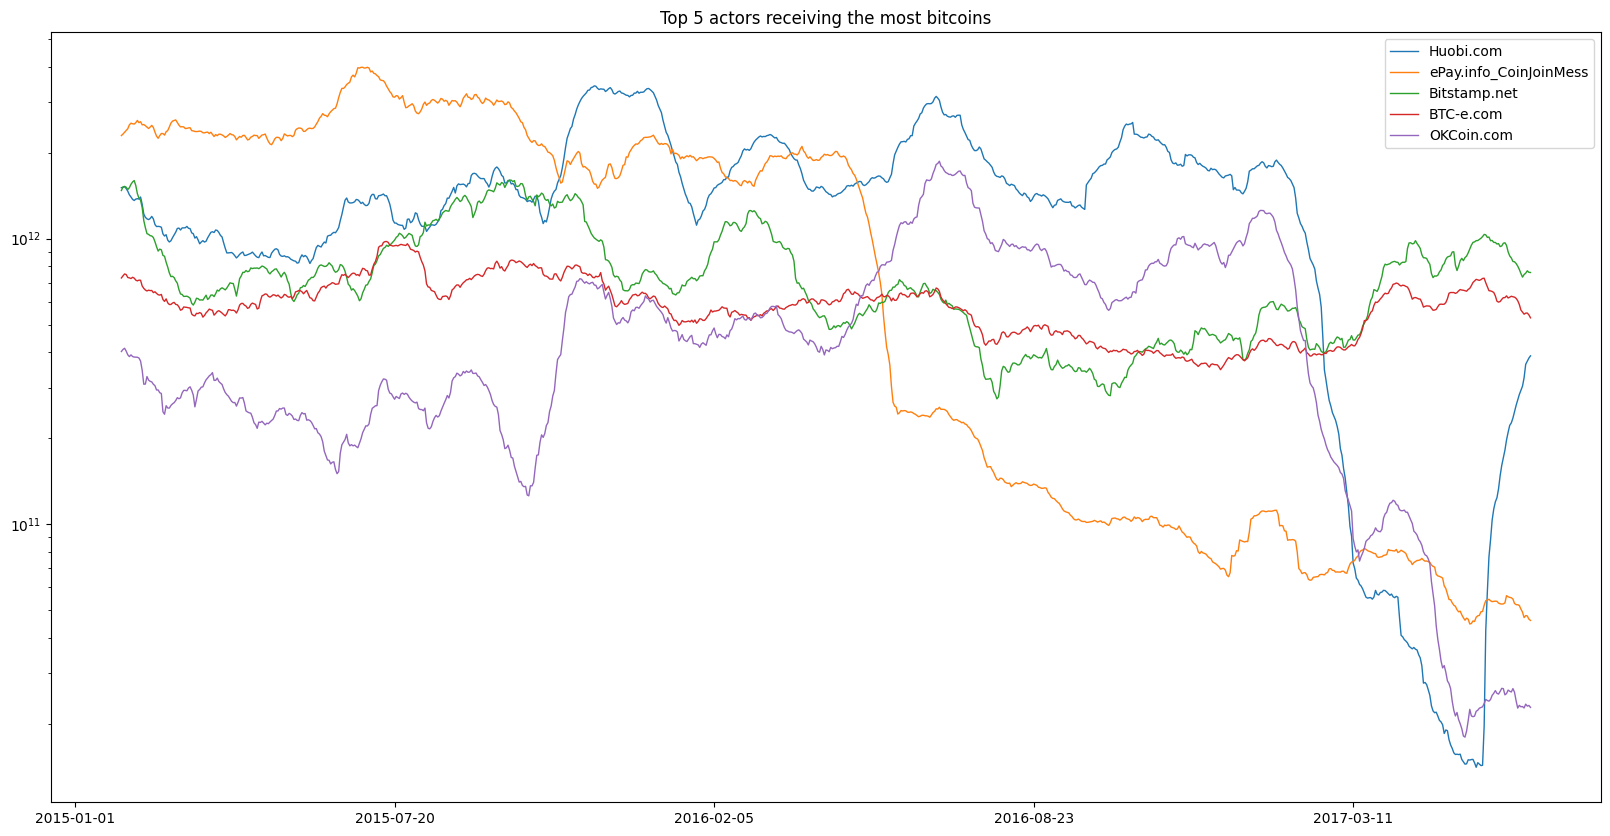

In [115]:
def PlotActors(df, actors, column, title):
        plt.figure(figsize=(20, 10))
        for actor in actors[:5]:
                date = df[df['identity'] == actor]['date'].values
                plt.plot(date, df_actor[df_actor['identity'] == actor][column].rolling(30).mean(), 
                linewidth = 1, label=actor)
                plt.xticks(date[::200])
                plt.yscale('log')
                plt.legend()
                plt.title('Top 5 actors receiving the most bitcoins')
        plt.show()

PlotActors(df_actor, most_reciving_actor, 'received', 'Top 5 actors receiving the most bitcoins')

#### Most spending actors

In [116]:
actors_spent = df_amount.sort_values(by='spent', ascending=False)
most_spending_actor = actors_spent.index[:5]
most_spending_actor

Index(['ePay.info_CoinJoinMess', 'Huobi.com', 'Bitstamp.net', 'Poloniex.com',
       'BTCC.com'],
      dtype='object', name='identity')

In [117]:
actors_received = df_amount.sort_values(by='received', ascending=False)
actors_received.index[:5]

Index(['Huobi.com', 'ePay.info_CoinJoinMess', 'Bitstamp.net', 'BTC-e.com',
       'OKCoin.com'],
      dtype='object', name='identity')

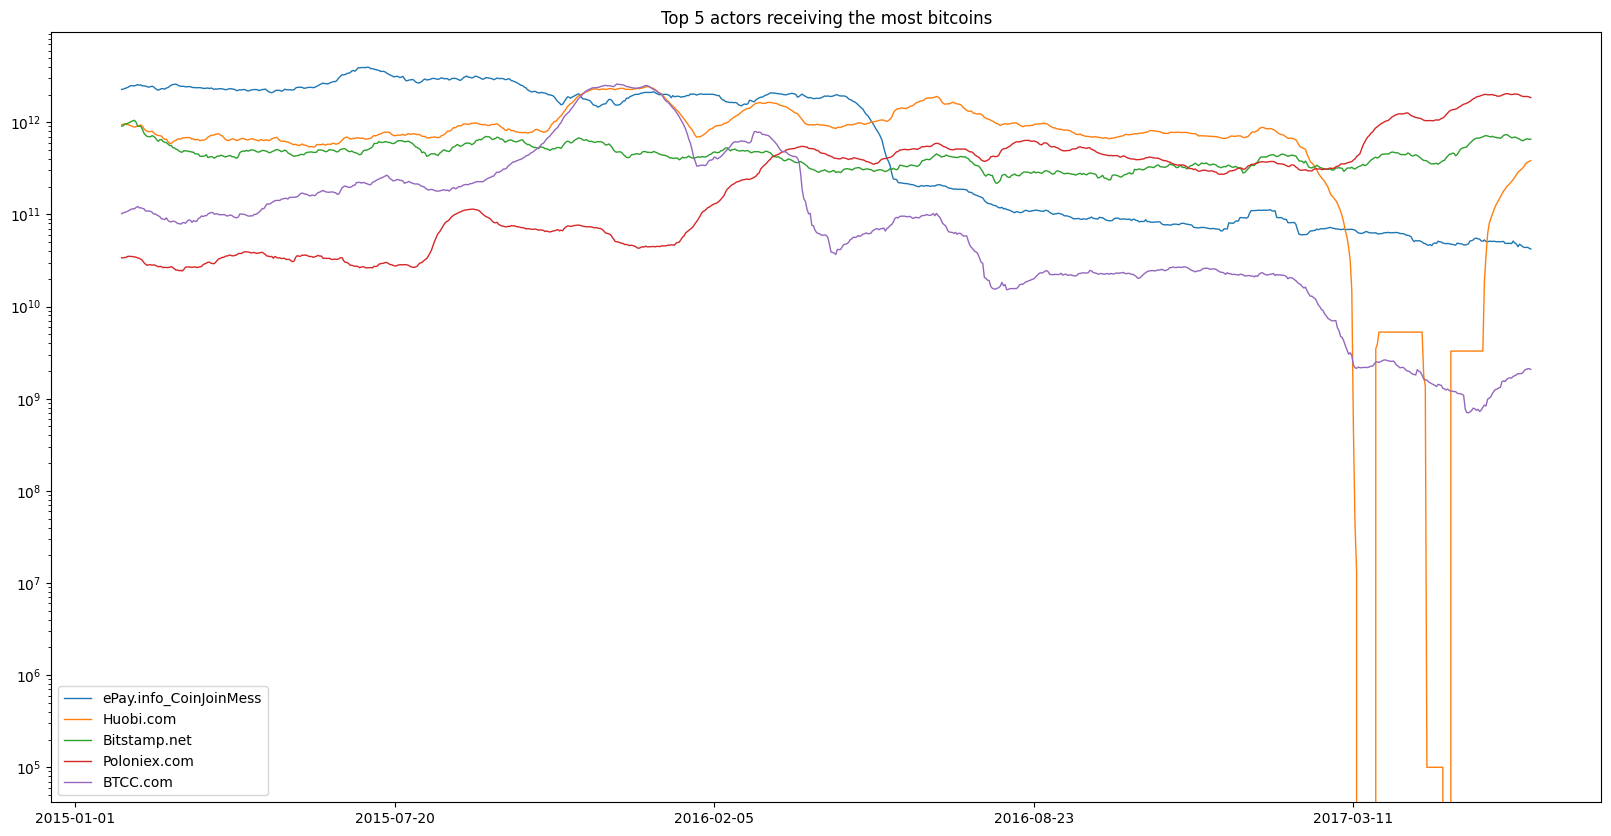

In [118]:
PlotActors(df_actor, most_spending_actor, 'spent', 'Top 5 actors spending the most bitcoins')

Why Huobi suddenly fall down ? 
We can found that following a 2017 ban on Bitcoin exchanges by the Chinese government, Huobi stopped Bitcoin withdrawals. Huobi China continues to operate as a blockchain consulting and research platform. 
https://en.wikipedia.org/wiki/Huobi 

Maybe it can be interesting to see the evolution of the Chinese actors. Compare the evolution of the Chinese actors with other platforms.

In [119]:
def get_ip(only_names):
    ip_list = []
    dictionary = {}
    for domain in only_names:
        try: 
            ip_address = socket.gethostbyname(domain)
            ip_list.append(ip_address)
            dictionary[domain] = ip_address
        except:
            continue
    return ip_list, dictionary

list_ip, nationnality = get_ip(df_actor['identity'].unique())
nationnality

{'HappyCoins.com': '137.117.175.14',
 'FortuneJack.com': '172.66.40.217',
 'SatoshiMines.com': '75.2.37.224',
 'Rollin.io': '185.10.48.117',
 'SatoshiDice.com': '104.26.2.152',
 'Loanbase.com': '162.159.136.54',
 'Bitstamp.net': '45.60.110.133',
 'Paymium.com': '104.20.38.238',
 'YoBit.net': '185.129.102.2',
 'FYBSG.com': '178.33.117.165',
 'Poloniex.com': '104.17.175.159',
 'Bitbond.com': '172.67.73.15',
 'HolyTransaction.com': '104.26.10.169',
 'SlushPool.com': '172.67.74.105',
 'BTCJam.com': '52.216.88.218',
 'Matbea.com': '116.203.57.90',
 'TheRockTrading.com': '172.65.236.106',
 'Huobi.com': '104.18.25.210',
 'HaoBTC.com': '120.24.152.222',
 'SafeDice.com': '188.114.96.2',
 'CoinSpot.com.au': '172.67.1.80',
 'CoinMotion.com': '172.66.43.62',
 'Xapo.com': '104.16.197.87',
 'CoinGaming.io': '104.21.79.237',
 'OKCoin.com': '18.211.48.9',
 'BitZillions.com': '104.21.22.167',
 'SecondsTrade.com': '3.130.204.160',
 'SimpleCoin.cz': '81.95.96.29',
 'PocketDice.io': '104.21.20.64',
 'BitB

In [120]:
nationnalities = nationnality.copy()
for key, ip in zip(list(nationnalities.keys()), nationnalities.values()):
    try:
        #ip_address = socket.gethostbyname(domain_name)
        response = requests.get(f"https://api.country.is/{ip}")
        data = response.json()
        nationnalities[key] = data["country"]
    except:
        nationnalities[key] = None


In [121]:
df_actor['nationnality'] = df_actor['identity'].map(nationnalities)
df_actor

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent,nationnality
0,2015.0,1.0,1.0,HappyCoins.com,1.377590e+09,4.0,2015-01-01,49596.0,0.004957,4.0,1.277500e+09,0.0,0.0,8.0,1.277500e+09,NL
1,2015.0,1.0,1.0,821,2.476057e+09,5.0,2015-01-01,10000.0,0.000851,1.0,1.174552e+09,0.0,0.0,2.0,1.174552e+09,NaN
2,2015.0,1.0,1.0,FortuneJack.com,1.201470e+08,29.0,2015-01-01,83000.0,0.194670,11.0,1.541127e+08,14158970.0,14158970.0,22.0,1.399538e+08,US
3,2015.0,1.0,1.0,396,1.906135e+10,70.0,2015-01-01,540000.0,0.023738,54.0,1.842989e+10,0.0,0.0,108.0,1.842989e+10,NaN
4,2015.0,1.0,1.0,SatoshiMines.com,7.401319e+08,193.0,2015-01-01,740000.0,0.447934,45.0,1.813624e+09,35044568.0,35044568.0,84.0,1.778579e+09,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90398,0.0,0.0,0.0,BTCJam.com,0.000000e+00,0.0,2017-06-17,145053.0,8.643929,1.0,1.387984e+06,0.0,0.0,2.0,1.387984e+06,US
90399,0.0,0.0,0.0,7277,0.000000e+00,0.0,2017-06-18,26600900.0,49.327293,266.0,7.252800e+05,0.0,0.0,532.0,7.252800e+05,NaN
90400,0.0,0.0,0.0,70063369,0.000000e+00,0.0,2017-06-22,284134.0,0.301961,1.0,9.352789e+07,0.0,0.0,1.0,9.352789e+07,NaN
90401,0.0,0.0,0.0,Loanbase.com,0.000000e+00,0.0,2017-06-29,131862.0,1.415791,1.0,9.049938e+06,0.0,0.0,2.0,9.049938e+06,None


In [122]:

np.array(df_actor['nationnality'].unique())

array(['NL', nan, 'US', None, 'RU', 'ES', 'DE', 'CN', 'CZ', 'HU'],
      dtype=object)

Text(0.5, 1.0, 'Number of actors per country')

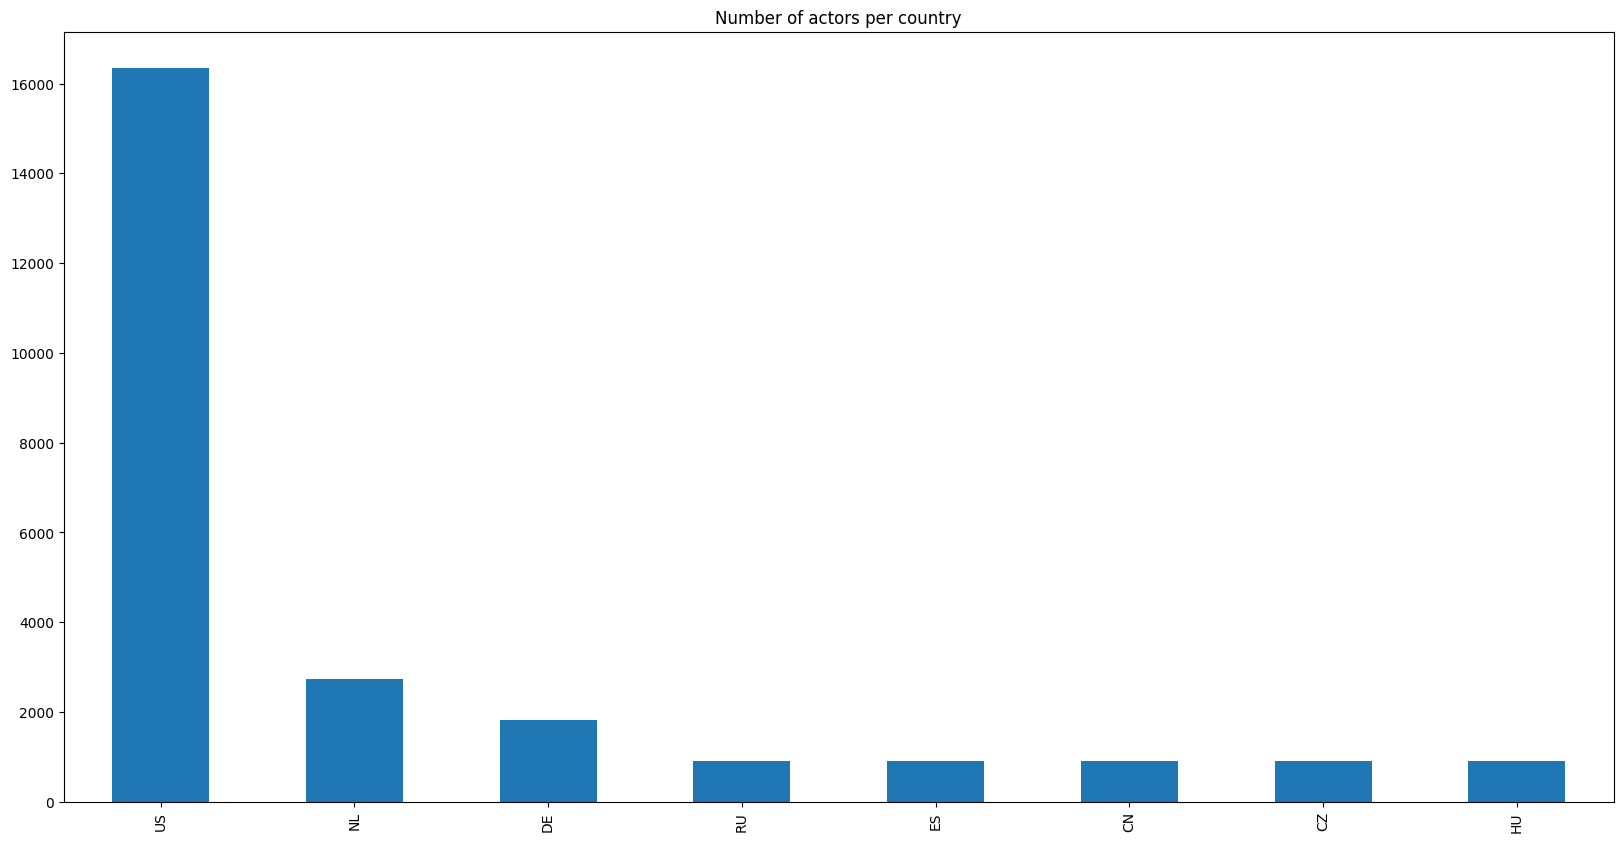

In [123]:
hist = df_actor['nationnality'].value_counts()
hist.plot(kind='bar', figsize=(20, 10))
plt.title('Number of actors per country')

In [125]:

nbr_of_actor_detected = df_actor.groupby('identity').count()
nbr_of_actor_detected[nbr_of_actor_detected['nationnality'] == 0].shape[0]
#.where(lambda x: x.notnull()).dropna().unique()

72

In [126]:
df_actor[df_actor['nationnality'] == "RU"]

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent,nationnality
14,2015.0,1.0,1.0,YoBit.net,1.220000e+04,1.0,2015-01-01,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,RU
167,2015.0,1.0,2.0,YoBit.net,5.718546e+06,2.0,2015-01-02,40000.0,0.976004,2.0,4.020821e+06,0.000000e+00,0.000000e+00,3.0,4.020821e+06,RU
191,2015.0,1.0,3.0,YoBit.net,9.990000e+06,1.0,2015-01-03,20000.0,0.532121,1.0,3.718546e+06,0.000000e+00,0.000000e+00,2.0,3.718546e+06,RU
285,2015.0,1.0,4.0,YoBit.net,1.588000e+04,1.0,2015-01-04,20000.0,0.199800,1.0,9.970000e+06,0.000000e+00,0.000000e+00,2.0,9.970000e+06,RU
402,2015.0,1.0,5.0,YoBit.net,4.135000e+04,2.0,2015-01-05,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,RU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89955,2017.0,6.0,26.0,YoBit.net,2.073443e+10,1763.0,2017-06-26,212429090.0,3.299810,469.0,8.857615e+10,1.162234e+09,5.902339e+10,935.0,2.955275e+10,RU
90054,2017.0,6.0,27.0,YoBit.net,3.239618e+10,2593.0,2017-06-27,162666050.0,3.162309,500.0,3.277525e+10,1.466756e+09,1.466756e+09,994.0,3.130849e+10,RU
90135,2017.0,6.0,28.0,YoBit.net,2.849432e+10,1864.0,2017-06-28,125584720.0,2.804716,487.0,3.112291e+10,1.824082e+09,6.420533e+09,974.0,2.470238e+10,RU
90210,2017.0,6.0,29.0,YoBit.net,1.870007e+10,1214.0,2017-06-29,71467160.0,2.596702,369.0,1.862400e+10,9.801094e+08,4.914883e+09,737.0,1.370912e+10,RU


In [132]:
nationality = {}
key = 'cc7a4f16f33d555cd962c06e5a27934e'
for url in df_actor['identity'].unique():
    response = requests.get(f"https://api.ipstack.com/{url}?access_key={key}")
    if (response.status_code != 200):
        continue
    print(response.json())
    ip_address = response.json()["ip"]

    # Récupération du pays d'origine à partir de l'adresse IP
    response = requests.get(f"https://api.ipstack.com/{ip_address}?access_key={key}")
    if (response.status_code != 200):
        continue
    nationality[url] = response.json()["country_name"]

nationnality

{'success': False, 'error': {'code': 105, 'type': 'https_access_restricted', 'info': 'Access Restricted - Your current Subscription Plan does not support HTTPS Encryption.'}}


KeyError: 'ip'

: 

In [130]:

requests.get(f"https://api.ipstack.com/{'huobi.com'}?access_key={key}")[]

<Response [200]>

In [ ]:
re